ARIMA (Autoregressive Integrated Moving Average) is a statistical model that captures the patterns in the data by considering the auto-correlation and moving average effects in the series. It is based on the idea that the past values of the time series can alone be used to predict the future values. The ARIMA model explains a given time series based on its own past values like its own lags and the lagged forcast errors.

Any non-seasonal time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models. 

ARIMA is characterized by 3 terms:

p: the order of the AR term
q: the order of the MA term
d: the number of differenceing required to make the time series stationary

If a time series has seasonal patterns, then we add seasonal terms and make it SARIMA. 

To use the ARIMA model, we make the time series stationary because Auto Regressive is a linear regression model that uses its own lags as predictors. Linear regression models work best when the predictiors are not correlated and are independent of each other.

The most common method to make a series stationary is to difference it.The value of d is the minimum number of dfferencing required to make the series stationary. And, if the time series is already stationary, d = 0.

Here, the p refers to the number of lags of Y to be used as predictors and q is the number of lagged forecast errors that should go into the ARIMA model.

How to determine right order of differenceing?
- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches zero fairly quick.
- If the autocorrelations are positive for many number of lags >= 10, then the series needs further differencing. Contrary, if the lag 1 autocorrelation itself is too negative, then the series is over-differenced.
- In case it's difficult to decide between two orders of differencing, theen use the order that gives the least standard deviation in the differenced series.


In [1]:
#checking if the series is stationary using ADF test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

df = pd.read_csv('wwwusage.csv', names = ['value'], header= 0)

df


,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


Here's what each part of the code does:

- `pd`: This is an alias for the pandas library, which provides functions for working with data in Python.
- `read_csv`: This is a function provided by pandas for reading CSV files into a DataFrame.
- `names=['value']`: This parameter tells pandas to name the column in the DataFrame as "value".
- `header=0`: This parameter tells pandas that the first row of the CSV file contains the column names.


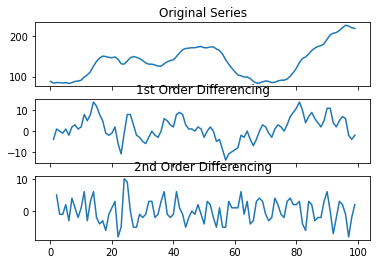

In [2]:
# Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(df.value); axes[0].set_title('Original Series')

# 1st Differencing
axes[1].plot(df.value.diff()); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
axes[2].plot(df.value.diff().diff()); axes[2].set_title('2nd Order Differencing')

plt.show()

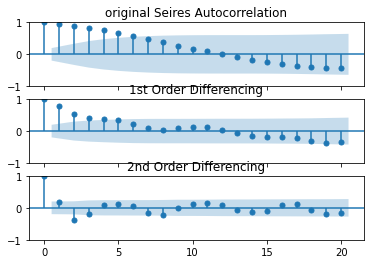

In [3]:
# Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
plot_acf(df.value, ax=axes[0], title="original Seires Autocorrelation")

# 1st Differencing
plot_acf(df.value.diff().dropna(), ax=axes[1], title="1st Order Differencing")

# 2nd Differencing
plot_acf(df.value.diff().diff().dropna(), ax=axes[2], title="2nd Order Differencing")

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.



In [4]:
from statsmodels.tsa.arima.model import ARIMA

#1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Fri, 19 May 2023   AIC                            516.253
Time:                        14:52:44   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.671      -0.373       0.241
sigma2         9.7898      1.421      6.889      0.000       7.005      12.575
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.98   Prob(JB):                         0.95
Heteroskedasticity (H):               0.63   Skew:                            -0.07
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Fri, 19 May 2023   AIC                            514.300
Time:                        14:52:44   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.000       7.040      12.547
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.86   Prob(JB):                         0.94
Heteroskedasticity (H):               0.63   Skew:                            -0.08
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

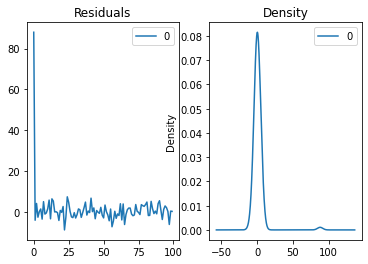

In [6]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

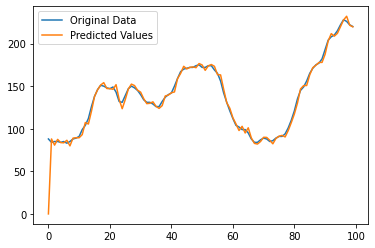

In [7]:
predicted_values = model_fit.predict(dynamic=False)

# Get the original data
original_data = model_fit.model.endog

plt.plot(original_data, label='Original Data')

# Plot the predicted values
plt.plot(predicted_values, label='Predicted Values')

plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


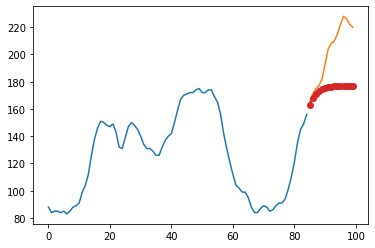

In [9]:
import pandas as pd
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
forcast_values= fitted.forecast(15, alpha=0.05)

forecast_series = pd.Series(forcast_values, index=test.index)

plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_series, label='forecast')
plt.plot(forcast_values, label='forecast', marker = "o")

# Plot


In [10]:
forecast_series

85    163.161121
86    167.885191
87    171.001581
88    173.057410
89    174.413606
90    175.308266
91    175.898457
92    176.287797
93    176.544638
94    176.714071
95    176.825844
96    176.899578
97    176.948219
98    176.980307
99    177.001475
Name: predicted_mean, dtype: float64

In [11]:
forcast_values

85    163.161121
86    167.885191
87    171.001581
88    173.057410
89    174.413606
90    175.308266
91    175.898457
92    176.287797
93    176.544638
94    176.714071
95    176.825844
96    176.899578
97    176.948219
98    176.980307
99    177.001475
Name: predicted_mean, dtype: float64

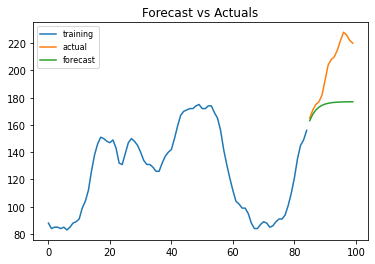

In [12]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forcast_values, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Fri, 19 May 2023   AIC                            438.860
Time:                        14:52:47   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1365      0.132      8.607      0.000       0.878       1.395
ar.L2         -0.5884      0.151     -3.898      0.000      -0.884      -0.293
ar.L3          0.3023      0.128      2.360      0.0

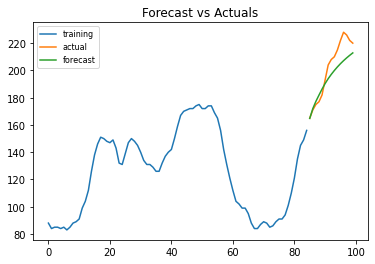

In [13]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  

print(fitted.summary())

# Forecast
forcast_values= fitted.forecast(15, alpha=0.05)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forcast_values, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [14]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast_values-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast_values, test.values)

NameError: name 'forecast_values' is not defined

In [ ]:
import pmdarima as pm

df = pd.read_csv('wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

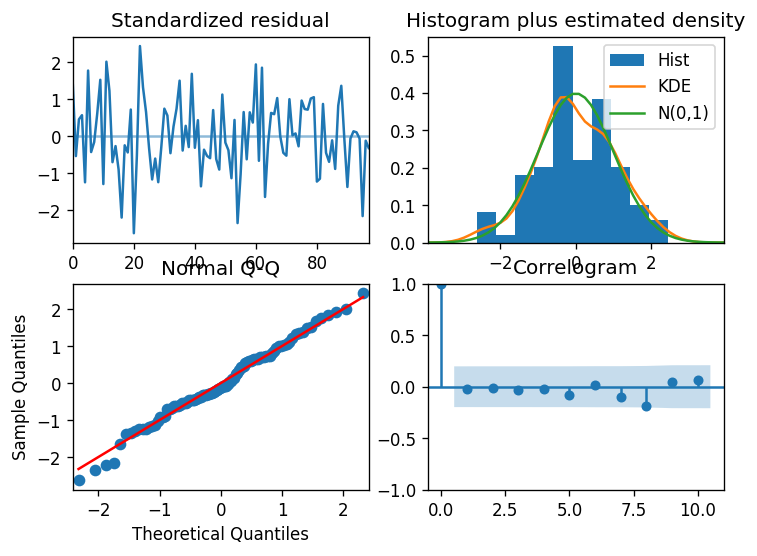

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -216.056
Date:                Fri, 19 May 2023   AIC                            440.111
Time:                        14:49:27   BIC                            449.787
Sample:                             0   HQIC                           443.998
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2943      0.285      1.032      0.302      -0.265       0.853
ar.L2         -0.4059      0.110     -3.691      0.000      -0.621      -0.190
ma.L1         -0.0727      0.307     -0.237      0.8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


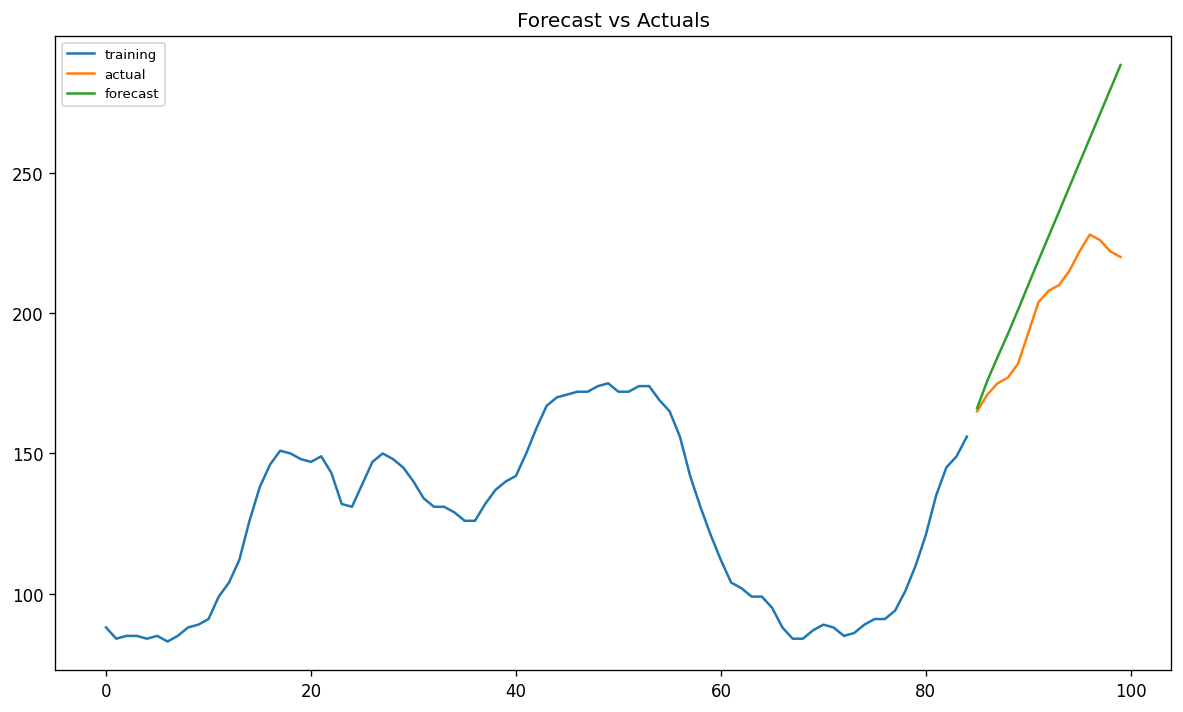

In [ ]:
model = ARIMA(train, order=(2, 2, 1))  
fitted = model.fit()  

print(fitted.summary())

# Forecast
forcast_values= fitted.forecast(15, alpha=0.05)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forcast_values, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast_values-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast_values, test.values)

/var/folders/x_/ydljc2zn6z30j2fhr27cbr4h0000gn/T/ipykernel_1344/2315257816.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
/var/folders/x_/ydljc2zn6z30j2fhr27cbr4h0000gn/T/ipykernel_1344/2315257816.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.12522186628001233,
 'me': -26.87149591727022,
 'mae': 26.87149591727022,
 'mpe': -0.12522186628001233,
 'rmse': 32.38238247968934,
 'acf1': 0.8714402841670187,
 'corr': 0.8528510919152512,
 'minmax': 0.12522186628001242}